# Machine Learning

There is a problem of classification where what I am looking for is to identifying whether the employee is living the company or not.

### Import libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

### Load Data

In [2]:
df_cleaned=pd.read_csv('data/HR_data_cleaned.csv')

In [3]:
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data quality issues 

In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
department               11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


After a quick review of the dataset I realise some issues such that:

* To deal better with ML algorithms and statistics the features must have a NUMERICAL value. Therefore ,some **features (sales and salary)** will be transformed to numerical.


- **left** : as "target" column, it should occupy the last position in the dataframe. It will be moved to there.

**1. Convert to numerical** : "salary" and "sales"

In [5]:
df_cleaned['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
#Dummy Coding
hr_salary = pd.get_dummies(df_cleaned['salary'])
hr_salary.sample(10)

,high,low,medium
9616,0,1,0
3485,0,0,1
3192,1,0,0
4701,0,1,0
8215,0,0,1
6543,0,0,1
1757,0,1,0
10771,0,0,1
10821,0,0,1
1788,0,1,0


In [8]:
#join
hr2=pd.merge(df_cleaned,hr_salary,left_index=True, right_index=True)
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [9]:
#Now it is the turn of "department" 
hr2['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
hr_department= hr2['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'], 
                                  [0,1,2,3,4,5,6,7,8,9],#new values
                                 inplace = False) #it will be modified in place
hr_department

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
11961    8
11962    1
11963    1
11964    6
11965    6
11966    5
11967    8
11968    8
11969    8
11970    0
11971    0
11972    0
11973    0
11974    0
11975    0
11976    0
11977    6
11978    7
11979    7
11980    7
11981    7
11982    6
11983    6
11984    5
11985    5
11986    5
11987    5
11988    5
11989    8
11990    6
Name: department, Length: 11991, dtype: int64

In [11]:
#finally, we include this values into the dataFrame as "department_numeric" columnn
hr2['department_numeric']=hr_department
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,high,low,medium,department_numeric
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0,0


In [12]:
#Now, I can remove "sales" and "salary" columns from DataFrame.Therefore it will include only numeric features
hr_numeric=hr2.drop(columns=['department','salary'])
hr_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,high,low,medium,department_numeric
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0


**2.Change the order of columns**: "left" column as "target" will be moved to the final of the data frame

In [13]:
cols = hr_numeric.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'department_numeric']

In [14]:
#Now "left" column will be the last one
cols_new = cols[:6]+cols[7:]+cols[6:7]
cols_new

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'department_numeric',
 'left']

In [15]:
#finally, it's included in the new dataframe called: hr_data
hr_data= hr_numeric[cols_new]
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,high,low,medium,department_numeric,left
0,0.38,0.53,2,157,3,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,0,1


In [16]:
#check values' type: 
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 12 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
work_accident            11991 non-null int64
promotion_last_5years    11991 non-null int64
high                     11991 non-null uint8
low                      11991 non-null uint8
medium                   11991 non-null uint8
department_numeric       11991 non-null int64
left                     11991 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 878.3 KB


At this point, our dataset is ready for being modeled.  Let's save and rename it!

### Saving cleaned dataset

In [17]:
hr_data.to_csv('data/HR_data_numeric.csv',index=False)

### Load Data

In [26]:
df_numeric=pd.read_csv('data/HR_data_numeric.csv')

### Brief analysis

In [ ]:
df_numeric.head()

In [23]:
df_numeric.shape

(11991, 12)

In [24]:
df_numeric.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'department_numeric',
       'left'],
      dtype='object')

### Definition of variables and split of the data

In [33]:
x=df_numeric[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'department_numeric']] #X will be the features
y=df_numeric['left'] #left column will be the target one (1=left, 0 =stay)

In [34]:
#Split the dataset into two parts: train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [35]:
#checking we have the desired 70% train, 30% split of the data
print("{0:0.2f}% in training set".format((len(x_train)/len(df_numeric.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df_numeric.index)) * 100))

66.99% in training set
33.01% in test set


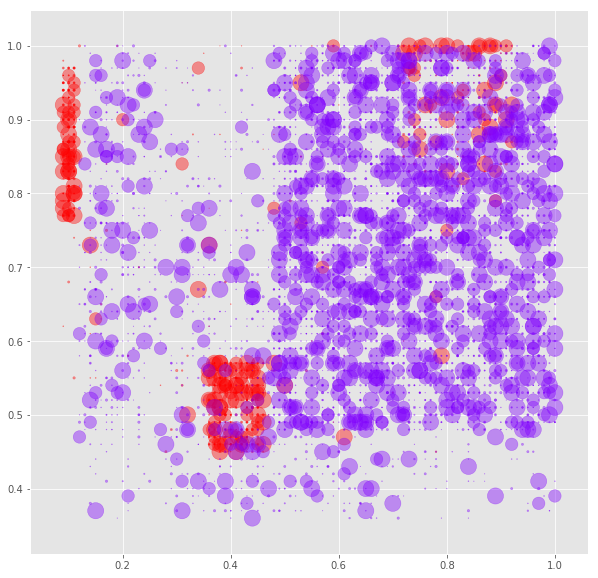

In [124]:
#Graph

X = df_numeric[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'department_numeric']].values
y = df_numeric['left']
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],X[:2],c=y,cmap="rainbow",alpha=0.4)
plt.show()

## Choosing the model

### Looking for the best accuracy, I will analyse some prediction models 

### Let's start with _K-nearest Neighbors_

In [84]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=10)

In [85]:
clf1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test,clf1.predict(x_test))

0.9295098534613441

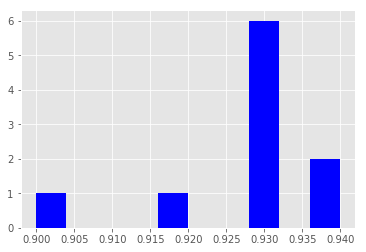

In [91]:
kn=cross_val_score(clf1,x,y,cv=10,scoring="accuracy")
plt.hist(kn, color='blue');

In [92]:
#Fitting the model
from sklearn.model_selection import GridSearchCV

In [93]:
clf1=GridSearchCV(estimator =KNeighborsClassifier(n_neighbors=5),
                  param_grid={"n_neighbors":np.arange(1,50)})

clf1.fit(x,y) #training the model with the best_params
clf1.best_params_

{'n_neighbors': 4}

In [99]:
accuracy_score(y_test,clf1.predict(x_test))

0.9641232945932289

In [96]:
from sklearn.model_selection import cross_val_score

In [100]:
cross_val_score(KNeighborsClassifier(n_neighbors=4),x,y).mean()

0.9298633941450096

## __Decision Tree__

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf2= GridSearchCV(DecisionTreeClassifier(max_depth=4),
                  param_grid={"max_depth":np.arange(1,10)})

In [52]:
clf2.fit(x,y)
clf2.best_score_

0.981402718705696

In [ ]:
from sklearn.model_selection import cross_val_score

## __Support Vector Machines__ 

In [53]:
from sklearn.svm import SVC

In [54]:
clf3= GridSearchCV(SVC(kernel="poly"),
                  param_grid={"C":[10,100],"degree":np.arange(1)},
                  verbose=10)

In [56]:
clf3.fit(x,y)
clf3.best_score_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8339169584792396, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8338754065549162, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340840840840841, total=   0.8s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8339169584792396, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8338754065549162, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340840840840841, total=   0.6s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.9s finished


0.8339588024351597

### In summary:

In [68]:
kn=cross_val_score(clf1,x,y,cv=10,scoring='accuracy').mean()

KeyboardInterrupt: 

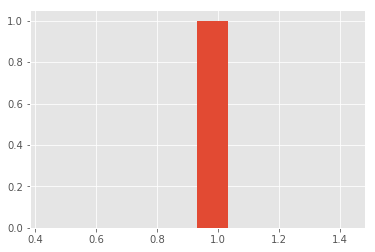

In [67]:
plt.hist(kn);

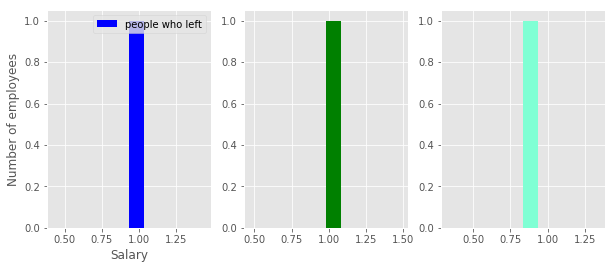

In [64]:
figure, axs = plt.subplots(ncols=3)

axs[0].hist(kn,color='blue')
axs[1].hist(dt,color='green')
axs[2].hist(svm,color='aquamarine')

axs[0].set_ylabel('Number of employees')
axs[0].set_xlabel('Salary')
#axs[1].set_xlabel('Salary')

figure.set_size_inches(10,4)

axs[0].legend(['people who left'])
#axs[1].legend(['people who stay'])
plt.show()

In [58]:
print(cross_val_score(clf1,x,y,cv=10,scoring='accuracy').mean())
print(cross_val_score(clf2,x,y,cv=10,scoring='accuracy').mean())
print(cross_val_score(clf3,x,y,cv=10,scoring='accuracy').mean())

0.9328659299416179
0.9818192938559912
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.7s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   1.0s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.4s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.7s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.7s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.7s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.8s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s finished


0.8339588546010563


In [ ]:
The best result is the 

0.9818192938559912

## Bagging

According to Wikipedia, [Bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating), also called __bagging__, is a machine learning ensemble meta-algorithm designed to __improve the stability and accuracy of machine learning algorithms__ used in statistical classification and regression. It also __reduces variance and helps to avoid overfitting__. 

Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. 